In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import copy
%matplotlib inline
from sklearn import preprocessing

In [2]:
plt.rc('font', family='NanumGothic')
plt.rcParams['axes.unicode_minus']=False

In [3]:
ap_addfac = pd.read_csv("D:/프로그래밍/2020.9.금융빅데이터/기웅/아파트 부대시설 정보.csv", sep=",", encoding="CP949")
ap_lenresidence = pd.read_csv("D:/프로그래밍/2020.9.금융빅데이터/기웅/아파트 세대 거주기간 정보.csv", sep=",", encoding="CP949")
ap_transfer = pd.read_csv("D:/프로그래밍/2020.9.금융빅데이터/기웅/아파트 세대 전출입 정보.csv", sep=",", encoding="CP949")
ap_genralinfo = pd.read_csv("D:/프로그래밍/2020.9.금융빅데이터/기웅/아파트 일반정보 및 시세.csv", sep=",", encoding="CP949")


-------------------- # 아파트 부대시설 정보

In [4]:
ap_addfac # 아파트 부대시설 정보

,기준년월,매매지역명,우편번호,아파트명,아파트주소,아파트준공일자,승강기수,CCTV수,주차대수,부대시설명,난방명,세대당주차대수,적재일시,센터코드
0,202004,서울특별시,3112,종로청계힐스테이트,서울특별시 종로구 숭인동길 21,20090320,10,93,342,"관리사무소, 노인정, 주민공동시설, 어린이놀이터, 휴게시설, 자전거보관소",개별난방,1.19,2.020040e+13,BBP17
1,202005,대구광역시,42281,시지3차태왕하이츠,대구광역시 수성구 욱수천로 77,20011211,7,43,242,"관리사무소, 노인정, 어린이놀이터, 자전거보관소",개별난방,1.03,2.020050e+13,BBP17
2,202005,대구광역시,41463,칠곡2차동서타운,대구광역시 북구 구암로32길 22,19961125,7,47,341,"관리사무소, 노인정, 보육시설, 어린이놀이터, 휴게시설, 자전거보관소",개별난방,1.02,2.020050e+13,BBP17
3,202005,대구광역시,41464,칠곡청구타운,대구광역시 북구 학정로 271,19951125,14,64,468,"관리사무소, 노인정, 어린이놀이터, 휴게시설",개별난방,1.00,2.020050e+13,BBP17
4,202005,대구광역시,41159,영남네오빌,대구광역시 동구 동촌로 190,20000629,0,170,1268,"관리사무소, 노인정, 보육시설, 주민공동시설, 어린이놀이터, 자전거보관소, 기타",개별난방,1.36,2.020050e+13,BBP17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5461,202005,강원도,25819,이도주공1단지,강원도 동해시 이원길 180-2,19991016,5,34,315,"관리사무소, 노인정, 보육시설, 어린이놀이터, 자전거보관소",개별난방,0.71,2.020050e+13,BBP17
5462,202005,대구광역시,42279,사월화성파크드림1단지,대구광역시 수성구 달구벌대로 3304,20060323,6,91,283,"관리사무소, 노인정, 보육시설, 주민공동시설, 어린이놀이터, 자전거보관소",개별난방,1.51,2.020050e+13,BBP17
5463,202005,대구광역시,42198,범물영남타운,대구광역시 수성구 용학로 316,19920820,15,105,508,"관리사무소, 노인정, 주민공동시설, 어린이놀이터",중앙난방,1.15,2.020050e+13,BBP17
5464,202005,대구광역시,41910,노마즈하우스,대구광역시 중구 공평로 105,20140121,0,68,218,관리사무소,개별난방,0.81,2.020050e+13,BBP17


In [5]:
ap_addfac.columns

Index(['기준년월', '매매지역명', '우편번호', '아파트명', '아파트주소', '아파트준공일자', '승강기수', 'CCTV수',
       '주차대수', '부대시설명', '난방명', '세대당주차대수', '적재일시', '센터코드'],
      dtype='object')

In [6]:
ap_addfac.isnull().sum()

기준년월       0
매매지역명      0
우편번호       0
아파트명       0
아파트주소      0
아파트준공일자    0
승강기수       0
CCTV수      0
주차대수       0
부대시설명      0
난방명        0
세대당주차대수    0
적재일시       0
센터코드       0
dtype: int64

In [7]:
ap_addfac[ap_addfac.columns[1]].unique() # 매매지역명

array(['서울특별시', '대구광역시', '강원도'], dtype=object)

In [8]:
ap_addfac[ap_addfac.columns[10]].unique() # 난방명

array(['개별난방', '지역난방', '중앙난방', '개별난방+기타'], dtype=object)

In [9]:
ap_addfac[ap_addfac.columns[6]].unique() # 승강기 수

array([10,  7, 14,  0, 17, 24, 25, 23, 13, 11,  9, 26, 21, 12, 34,  6, 30,
       16, 22, 15, 18, 31, 19, 52, 29, 42,  8,  5,  4, 27, 32, 28, 46,  2,
       20, 48, 37, 33,  3,  1, 45, 40, 50, 36, 35, 57, 38, 49, 54, 39, 44,
       43], dtype=int64)

In [10]:
ap_addfac[ap_addfac.columns[7]].unique() # cctv ap_addfac수

array([ 93,  43,  47,  64, 170,  76, 127, 217, 104,  48, 123,  91, 156,
        58,  39, 264, 472, 160, 108, 422,  63, 145,  78, 151,  80, 122,
       112,  84, 121,  90, 400,  25, 234,  99,  68, 144, 210, 139,  75,
        54, 282, 115,  23,   0,  31, 105,  38,  70, 614, 415, 129, 248,
        55, 205, 126,  41,  32,  96,  73,  51,  40,  60, 260, 247,  97,
       125,  46,  28,  62, 180, 137, 319, 153,  30, 135, 118, 120,  37,
        72,  29, 130, 229,  95,  71, 189,  88,  26, 100,  33, 111,  36,
       245, 176, 134,  61,  21,  27,  14, 103, 148, 119, 209, 208, 240,
       301,  81,  66,  77, 117, 190, 266,  45,  56, 211, 116,  83, 167,
       191,  69, 131, 106, 181, 201,  16,  50, 303, 239, 165,  17, 365,
        57,  44, 284, 157, 214, 113, 178, 237, 309, 206, 140, 162, 174,
       183,  74,  86, 197,  10,  35, 132,  94, 101, 193,  52,  92, 271,
       220,  87,  67,  53, 142,  20, 256,  24,  42,   4, 136,  65,  34,
       336, 187, 231, 306, 246, 150, 215, 294, 114,  85,   8, 10

In [11]:
ap_addfac[ap_addfac.columns[11]].unique() # 세대 당 주차대수

array([1.19, 1.03, 1.02, 1.  , 1.36, 1.4 , 0.92, 1.42, 0.78, 1.2 , 1.35,
       1.44, 1.33, 1.01, 0.99, 1.45, 2.29, 1.15, 1.72, 1.41, 1.84, 1.58,
       1.66, 1.06, 1.04, 1.23, 2.07, 1.59, 0.33, 1.46, 1.11, 1.09, 0.41,
       1.18, 0.45, 1.43, 1.05, 1.31, 1.14, 1.34, 0.79, 1.76, 1.29, 1.25,
       1.52, 1.48, 1.13, 1.98, 0.98, 1.65, 1.71, 0.46, 0.86, 1.39, 1.53,
       0.84, 1.08, 1.17, 0.93, 1.16, 0.89, 0.9 , 1.07, 1.21, 0.77, 1.1 ,
       1.94, 0.62, 1.55, 0.53, 1.3 , 0.69, 1.27, 0.83, 1.22, 1.6 , 1.82,
       0.91, 0.85, 1.54, 0.88, 0.94, 0.8 , 1.56, 0.7 , 1.93, 1.28, 1.12,
       1.86, 0.95, 1.38, 1.57, 1.62, 1.61, 1.5 , 1.26, 1.95, 1.24, 2.22,
       1.79, 2.06, 0.25, 0.76, 0.75, 0.48, 0.38, 1.97, 0.5 , 0.63, 0.97,
       0.72, 2.37, 0.64, 0.67, 2.03, 0.68, 0.4 , 0.42, 1.37, 0.65, 0.81,
       0.82, 0.51, 0.71, 0.74, 1.47, 0.61, 2.16, 2.11, 1.88, 0.96, 1.64,
       0.73, 2.09, 1.32, 0.55, 0.6 , 0.87, 0.66, 0.28, 1.69, 1.63, 0.43,
       1.96, 0.34, 0.58, 0.59, 0.57, 2.34, 0.56, 1.

In [12]:
ap_addfac['아파트명'].unique()

array(['종로청계힐스테이트', '시지3차태왕하이츠', '칠곡2차동서타운', ..., '신기모란(2차)', '화성',
       '우방아이유쉘'], dtype=object)

In [13]:
len(ap_addfac['아파트명'].unique())

1372

-------------------- # 아파트 거주기간 정보

In [14]:
ap_lenresidence

,기준년월,매매지역명,우편번호,아파트명,아파트주소,아파트동명,1년미만거주기간세대수,1년거주기간세대수,2년거주기간세대수,3년거주기간세대수,4년거주기간세대수,5년이상거주기간세대수,합계세대수,적재일시,센터코드
0,201904,강원도,24222,춘천롯데캐슬더퍼스트아파트1단지,강원도 춘천시 마장길 58,101,15,6,10,8,3,23,73,2.019120e+13,BBP17
1,201904,강원도,24224,사농현대아파트,강원도 춘천시 영서로 2920,110,1,2,2,5,3,44,60,2.019120e+13,BBP17
2,201904,강원도,24224,사농현대아파트,강원도 춘천시 영서로 2920,111,2,3,5,3,2,43,60,2.019120e+13,BBP17
3,201904,강원도,24224,사농현대아파트,강원도 춘천시 영서로 2920,112,2,2,6,5,0,43,60,2.019120e+13,BBP17
4,201904,강원도,24225,롯데인벤스우두파크,강원도 춘천시 충열로 29,102,3,1,1,4,0,16,28,2.019120e+13,BBP17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27786,202005,대구광역시,41075,신서그린빌,대구광역시 동구 반야월북로 251,107,2,0,1,1,4,10,18,2.020050e+13,BBP17
27787,202005,대구광역시,41075,신서그린빌,대구광역시 동구 반야월북로 251,108,1,1,2,1,2,21,28,2.020050e+13,BBP17
27788,202005,대구광역시,41075,신서청구타운,대구광역시 동구 반야월북로55길 19,101,0,0,4,13,13,90,120,2.020050e+13,BBP17
27789,202005,대구광역시,41075,신서청구타운,대구광역시 동구 반야월북로55길 19,102,0,0,0,0,0,90,90,2.020050e+13,BBP17


In [15]:
ap_lenresidence['매매지역명'].unique()

array(['강원도', '대구광역시', '서울특별시'], dtype=object)

In [16]:
ap_lenresidence['아파트명'].unique()

array(['춘천롯데캐슬더퍼스트아파트1단지', '사농현대아파트', '롯데인벤스우두파크', ..., '칠곡네스빌',
       '율하휴먼시아8단지', '율하휴먼시아10단지'], dtype=object)

In [17]:
len(ap_lenresidence['아파트명'].unique())

1114

# 우편번호를 통해 테이블조인 가능할듯

# 1. 서울, 대구, 강원도 나눠서 보기

# 2. merge를 통해 / 우편번호를 기준으로 / inner join 하자

# 3. 아파트의 부대시설정보들에 따른 거주기간 세대수에 상관계수
#     를 찍어보는 것도 의미가 있을 듯

-------------------- # 아파트 세대 전출입 정보

In [18]:
ap_transfer

,기준년월,매매지역명,우편번호,아파트명,아파트주소,아파트동명,전출세대수,전입세대수,적재일시,센터코드
0,201904,강원도,24230,삼성아파트,강원도 춘천시 충열로 30,103,0,1,2.019120e+13,BBP17
1,201904,강원도,24230,삼성아파트,강원도 춘천시 충열로 30,101,1,0,2.019120e+13,BBP17
2,201904,강원도,24230,삼성아파트,강원도 춘천시 충열로 30,101,0,0,2.019120e+13,BBP17
3,201904,강원도,24230,삼성아파트,강원도 춘천시 충열로 30,102,0,0,2.019120e+13,BBP17
4,201904,강원도,24447,퇴계이안,강원도 춘천시 영서로 2169,106,0,0,2.019120e+13,BBP17
...,...,...,...,...,...,...,...,...,...,...
22798,202005,대구광역시,42511,앞산힐스테이트,대구광역시 남구 대덕로 166,105,1,1,2.020050e+13,BBP17
22799,202005,대구광역시,42514,효성타운,대구광역시 남구 효성중앙길 37,101,0,3,2.020050e+13,BBP17
22800,202005,대구광역시,42514,효성타운,대구광역시 남구 효성중앙길 37,103,0,1,2.020050e+13,BBP17
22801,202005,대구광역시,42514,효성타운,대구광역시 남구 효성중앙길 37,106,1,1,2.020050e+13,BBP17


In [19]:
ap_transfer['매매지역명'].unique()

array(['강원도', '대구광역시', '서울특별시'], dtype=object)

In [20]:
ap_transfer['아파트명'].unique()

array(['삼성아파트', '퇴계이안', '단계현대', ..., '대구연경천년나무1단지', '서희스타힐스테이', '침산태왕리더스'],
      dtype=object)

In [21]:
len(ap_transfer['아파트명'].unique())

1107

In [22]:
len(ap_transfer['우편번호'].unique())

698

# 서울,대구,강원도 지역별로 나눈 후

# 기준년월에 따른 전출/전입 세대 수를 구하면

# 시간의 흐름에 따른 인구 흐름을 대강 볼 수 있지 않을까

-------------------------- # 아파트 일반정보 및 시세

In [23]:
ap_genralinfo

,기준년월,매매지역명,우편번호,아파트명,아파트주소,아파트세대수,아파트동수,아파트면적값,최근매매실거래가격,최근매매실거래일자,...,최근전세실거래일자,매매하위평균가격,매매일반평균가격,매매상위평균가격,전세하위평균가격,전세일반평균가격,전세상위평균가격,시세기준일자,적재일시,센터코드
0,201905,강원도,25912,동부,강원도 삼척시 동해대로 4273,360,3,59.83,80500000,20190414,...,20190304,70000000,77500000,85000000,50000000,57500000,65000000,20190520,2.020070e+13,BBP17
1,201905,강원도,25723,삼성,강원도 동해시 해안로 605,114,3,84.99,108000000,20190402,...,20190305,112000000,118500000,125000000,75000000,77500000,80000000,20190520,2.020070e+13,BBP17
2,201905,강원도,25723,삼성,강원도 동해시 해안로 605,76,3,60.00,80000000,20190319,...,20190322,74000000,79500000,85000000,50000000,52500000,55000000,20190520,2.020070e+13,BBP17
3,201904,서울특별시,3075,아남3,서울특별시 종로구 혜화로3길 5,28,1,50.49,540000000,20181029,...,20181030,470000000,480000000,490000000,350000000,365000000,380000000,20190408,2.020070e+13,BBP17
4,201904,서울특별시,3107,종로센트레빌,서울특별시 종로구 동망산길 47,180,6,59.92,700000000,20180825,...,20190330,620000000,640000000,660000000,380000000,395000000,410000000,20190408,2.020070e+13,BBP17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56244,202005,대구광역시,42509,대덕2차,대구광역시 남구 앞산순환로 655,86,6,84.99,245000000,20191119,...,20180913,223000000,240500000,258000000,190000000,200000000,210000000,20200518,2.020070e+13,BBP17
56245,202005,대구광역시,42509,대덕2차,대구광역시 남구 앞산순환로 655,300,6,134.70,384000000,20200421,...,20191203,320000000,340000000,360000000,270000000,285000000,300000000,20200518,2.020070e+13,BBP17
56246,202005,대구광역시,42509,대덕2차,대구광역시 남구 앞산순환로 655,104,6,113.09,295000000,20191207,...,20191016,270000000,290000000,310000000,230000000,240000000,250000000,20200518,2.020070e+13,BBP17
56247,202005,대구광역시,42513,래미안웰리스트,대구광역시 남구 효성중앙길 82,56,7,165.83,875000000,20200220,...,20190701,800000000,845000000,890000000,550000000,575000000,600000000,20200518,2.020070e+13,BBP17


In [24]:
ap_genralinfo.columns

Index(['기준년월', '매매지역명', '우편번호', '아파트명', '아파트주소', '아파트세대수', '아파트동수', '아파트면적값',
       '최근매매실거래가격', '최근매매실거래일자', '최근전세실거래가격', '최근전세실거래일자', '매매하위평균가격',
       '매매일반평균가격', '매매상위평균가격', '전세하위평균가격', '전세일반평균가격', '전세상위평균가격', '시세기준일자',
       '적재일시', '센터코드'],
      dtype='object')

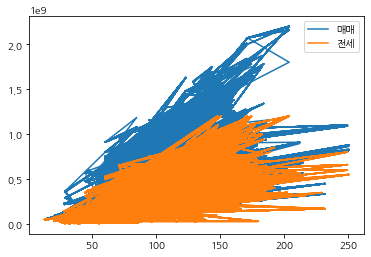

In [25]:
plt.plot(ap_genralinfo['아파트면적값'], ap_genralinfo['최근매매실거래가격'], label='매매')
plt.plot(ap_genralinfo['아파트면적값'], ap_genralinfo['최근전세실거래가격'], label='전세')
plt.legend()
plt.show()

In [26]:
ap_genralinfo.corr().style.background_gradient(cmap='coolwarm')

D:\anaconda\envs\tensorflow3\lib\site-packages\pandas\io\formats\style.py:1089: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(s.to_numpy()) if vmin is None else vmin
D:\anaconda\envs\tensorflow3\lib\site-packages\pandas\io\formats\style.py:1090: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(s.to_numpy()) if vmax is None else vmax


,기준년월,우편번호,아파트세대수,아파트동수,아파트면적값,최근매매실거래가격,최근매매실거래일자,최근전세실거래가격,최근전세실거래일자,매매하위평균가격,매매일반평균가격,매매상위평균가격,전세하위평균가격,전세일반평균가격,전세상위평균가격,시세기준일자,적재일시
기준년월,1.000000,-0.006040,-0.010544,-0.002656,0.003831,0.029311,0.718011,0.031132,0.549979,0.019832,0.019856,0.019860,0.018128,0.018128,0.018111,0.999999,nan
우편번호,-0.006040,1.000000,-0.008130,0.028689,0.106569,0.121832,0.014987,0.122033,-0.016498,0.117007,0.117522,0.117880,0.121480,0.122234,0.122808,-0.006040,nan
아파트세대수,-0.010544,-0.008130,1.000000,0.354823,-0.173059,-0.134840,0.223544,-0.105002,0.297143,-0.135623,-0.133365,-0.131230,-0.112659,-0.109878,-0.107244,-0.010545,nan
아파트동수,-0.002656,0.028689,0.354823,1.000000,0.077821,0.068186,0.095551,0.083731,0.145807,0.063244,0.066731,0.069791,0.081939,0.084828,0.087380,-0.002656,nan
아파트면적값,0.003831,0.106569,-0.173059,0.077821,1.000000,0.646810,-0.133457,0.680088,-0.143321,0.647192,0.649828,0.651618,0.692533,0.693124,0.693022,0.003831,nan
최근매매실거래가격,0.029311,0.121832,-0.134840,0.068186,0.646810,1.000000,-0.126834,0.931992,-0.002182,0.989965,0.990978,0.991021,0.957808,0.959898,0.960915,0.029311,nan
최근매매실거래일자,0.718011,0.014987,0.223544,0.095551,-0.133457,-0.126834,1.000000,-0.113329,0.559404,-0.146385,-0.145520,-0.144619,-0.131543,-0.130517,-0.129462,0.718056,nan
최근전세실거래가격,0.031132,0.122033,-0.105002,0.083731,0.680088,0.931992,-0.113329,1.000000,0.011781,0.934431,0.935583,0.935799,0.969837,0.970666,0.970526,0.031133,nan
최근전세실거래일자,0.549979,-0.016498,0.297143,0.145807,-0.143321,-0.002182,0.559404,0.011781,1.000000,-0.009374,-0.008340,-0.007408,-0.010847,-0.007574,-0.004587,0.550016,nan
매매하위평균가격,0.019832,0.117007,-0.135623,0.063244,0.647192,0.989965,-0.146385,0.934431,-0.009374,1.000000,0.999486,0.998155,0.962222,0.963797,0.964342,0.019832,nan


# 아파트 일반정보 및 시세의 실거래/평균가격 들을 y값으로 설정하고

# 다른 df의 기타 컬럼들을 x값으로 설정해서 모델링해볼수 있을 듯

# ***) 4개의 df를 어떻게 효과적으로 join할까.

# ***) 우편번호로 조인하고 싶지만 아쉽게도 우편번호에 두가지 아파트가  함께 잡힐 수도 있다.

In [27]:
ap_genralinfo

,기준년월,매매지역명,우편번호,아파트명,아파트주소,아파트세대수,아파트동수,아파트면적값,최근매매실거래가격,최근매매실거래일자,...,최근전세실거래일자,매매하위평균가격,매매일반평균가격,매매상위평균가격,전세하위평균가격,전세일반평균가격,전세상위평균가격,시세기준일자,적재일시,센터코드
0,201905,강원도,25912,동부,강원도 삼척시 동해대로 4273,360,3,59.83,80500000,20190414,...,20190304,70000000,77500000,85000000,50000000,57500000,65000000,20190520,2.020070e+13,BBP17
1,201905,강원도,25723,삼성,강원도 동해시 해안로 605,114,3,84.99,108000000,20190402,...,20190305,112000000,118500000,125000000,75000000,77500000,80000000,20190520,2.020070e+13,BBP17
2,201905,강원도,25723,삼성,강원도 동해시 해안로 605,76,3,60.00,80000000,20190319,...,20190322,74000000,79500000,85000000,50000000,52500000,55000000,20190520,2.020070e+13,BBP17
3,201904,서울특별시,3075,아남3,서울특별시 종로구 혜화로3길 5,28,1,50.49,540000000,20181029,...,20181030,470000000,480000000,490000000,350000000,365000000,380000000,20190408,2.020070e+13,BBP17
4,201904,서울특별시,3107,종로센트레빌,서울특별시 종로구 동망산길 47,180,6,59.92,700000000,20180825,...,20190330,620000000,640000000,660000000,380000000,395000000,410000000,20190408,2.020070e+13,BBP17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56244,202005,대구광역시,42509,대덕2차,대구광역시 남구 앞산순환로 655,86,6,84.99,245000000,20191119,...,20180913,223000000,240500000,258000000,190000000,200000000,210000000,20200518,2.020070e+13,BBP17
56245,202005,대구광역시,42509,대덕2차,대구광역시 남구 앞산순환로 655,300,6,134.70,384000000,20200421,...,20191203,320000000,340000000,360000000,270000000,285000000,300000000,20200518,2.020070e+13,BBP17
56246,202005,대구광역시,42509,대덕2차,대구광역시 남구 앞산순환로 655,104,6,113.09,295000000,20191207,...,20191016,270000000,290000000,310000000,230000000,240000000,250000000,20200518,2.020070e+13,BBP17
56247,202005,대구광역시,42513,래미안웰리스트,대구광역시 남구 효성중앙길 82,56,7,165.83,875000000,20200220,...,20190701,800000000,845000000,890000000,550000000,575000000,600000000,20200518,2.020070e+13,BBP17


In [28]:
temp1_g = copy.copy(ap_genralinfo)
# temp1_g = temp1_g.loc[(ap_genralinfo['매매지역명'] == '서울특별시')]
temp1_g = temp1_g.sort_values(by=['기준년월','우편번호']).reset_index(drop=True)
temp1_g

,기준년월,매매지역명,우편번호,아파트명,아파트주소,아파트세대수,아파트동수,아파트면적값,최근매매실거래가격,최근매매실거래일자,...,최근전세실거래일자,매매하위평균가격,매매일반평균가격,매매상위평균가격,전세하위평균가격,전세일반평균가격,전세상위평균가격,시세기준일자,적재일시,센터코드
0,201904,서울특별시,3010,삼성,서울특별시 종로구 평창문화로 172,88,2,84.93,505000000,20181127,...,20190213,420000000,450000000,480000000,310000000,335000000,360000000,20190408,2.020070e+13,BBP17
1,201904,서울특별시,3010,삼성,서울특별시 종로구 평창문화로 172,86,2,59.97,385000000,20190128,...,20190126,330000000,355000000,380000000,250000000,260000000,270000000,20190408,2.020070e+13,BBP17
2,201904,서울특별시,3010,롯데낙천대,서울특별시 종로구 평창문화로 140,14,3,87.27,630000000,20190319,...,20190330,540000000,570000000,600000000,350000000,380000000,410000000,20190408,2.020070e+13,BBP17
3,201904,서울특별시,3010,롯데낙천대,서울특별시 종로구 평창문화로 140,24,3,84.21,575000000,20190123,...,20170321,520000000,545000000,570000000,350000000,365000000,380000000,20190408,2.020070e+13,BBP17
4,201904,서울특별시,3010,롯데낙천대,서울특별시 종로구 평창문화로 140,28,3,133.34,730000000,20180202,...,20180312,780000000,805000000,830000000,500000000,515000000,530000000,20190408,2.020070e+13,BBP17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56244,202005,대구광역시,42840,시영은행,대구광역시 달서구 월곡로 112,430,3,59.96,163000000,20200518,...,20200328,130000000,140000000,150000000,100000000,110000000,120000000,20200518,2.020070e+13,BBP17
56245,202005,대구광역시,42840,시영장미3,대구광역시 달서구 상화로 370,180,3,43.20,78000000,20200508,...,20200427,75000000,85000000,95000000,65000000,72500000,80000000,20200518,2.020070e+13,BBP17
56246,202005,대구광역시,42840,시영장미3,대구광역시 달서구 상화로 370,360,3,49.80,108000000,20200506,...,20200114,90000000,100000000,110000000,81000000,89000000,97000000,20200518,2.020070e+13,BBP17
56247,202005,대구광역시,42840,시영장미4,대구광역시 달서구 상화로 380,210,4,43.20,79000000,20200509,...,20191119,71000000,81000000,91000000,65000000,71000000,77000000,20200518,2.020070e+13,BBP17


In [29]:
ap_genralinfo.loc[(ap_genralinfo['매매지역명'] == '서울특별시')]

,기준년월,매매지역명,우편번호,아파트명,아파트주소,아파트세대수,아파트동수,아파트면적값,최근매매실거래가격,최근매매실거래일자,...,최근전세실거래일자,매매하위평균가격,매매일반평균가격,매매상위평균가격,전세하위평균가격,전세일반평균가격,전세상위평균가격,시세기준일자,적재일시,센터코드
3,201904,서울특별시,3075,아남3,서울특별시 종로구 혜화로3길 5,28,1,50.49,540000000,20181029,...,20181030,470000000,480000000,490000000,350000000,365000000,380000000,20190408,2.020070e+13,BBP17
4,201904,서울특별시,3107,종로센트레빌,서울특별시 종로구 동망산길 47,180,6,59.92,700000000,20180825,...,20190330,620000000,640000000,660000000,380000000,395000000,410000000,20190408,2.020070e+13,BBP17
5,201904,서울특별시,3107,종로센트레빌,서울특별시 종로구 동망산길 47,72,6,114.67,850000000,20180826,...,20181128,840000000,860000000,880000000,520000000,530000000,540000000,20190408,2.020070e+13,BBP17
6,201904,서울특별시,3107,종로센트레빌,서울특별시 종로구 동망산길 47,164,6,84.92,800000000,20180912,...,20190322,750000000,775000000,800000000,440000000,460000000,480000000,20190408,2.020070e+13,BBP17
7,201904,서울특별시,3113,롯데캐슬천지인,서울특별시 종로구 종로 347,110,2,84.95,722000000,20180718,...,20190311,690000000,720000000,750000000,500000000,525000000,550000000,20190408,2.020070e+13,BBP17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54001,202005,서울특별시,3121,동대문,서울특별시 종로구 지봉로 25,132,1,28.80,365000000,20200422,...,20191224,295000000,315000000,335000000,115000000,130000000,145000000,20200518,2.020070e+13,BBP17
54002,202005,서울특별시,3104,두산,서울특별시 종로구 지봉로5길 7,240,3,84.90,899000000,20191214,...,20200427,810000000,847500000,885000000,460000000,490000000,520000000,20200518,2.020070e+13,BBP17
54003,202005,서울특별시,3104,두산,서울특별시 종로구 지봉로5길 7,289,3,59.95,655000000,20200517,...,20200514,610000000,630000000,650000000,340000000,355000000,370000000,20200518,2.020070e+13,BBP17
54004,202005,서울특별시,3093,창신쌍용1,서울특별시 종로구 동망산길 19,78,5,106.62,685000000,20200119,...,20200227,660000000,697500000,735000000,355000000,377500000,400000000,20200518,2.020070e+13,BBP17


In [30]:
ap_genralinfo.loc[(ap_genralinfo['매매지역명'] == '대구광역시')]

,기준년월,매매지역명,우편번호,아파트명,아파트주소,아파트세대수,아파트동수,아파트면적값,최근매매실거래가격,최근매매실거래일자,...,최근전세실거래일자,매매하위평균가격,매매일반평균가격,매매상위평균가격,전세하위평균가격,전세일반평균가격,전세상위평균가격,시세기준일자,적재일시,센터코드
73,201904,대구광역시,41915,대구역센트럴자이,대구광역시 중구 서성로 99,221,6,72.83,500000000,20190315,...,20180908,455000000,477500000,500000000,310000000,325000000,340000000,20190408,2.020070e+13,BBP17
74,201904,대구광역시,41915,대구역센트럴자이,대구광역시 중구 서성로 99,623,6,84.64,650000000,20190401,...,20190313,535000000,572500000,610000000,320000000,345000000,370000000,20190408,2.020070e+13,BBP17
75,201904,대구광역시,41915,대구역센트럴자이,대구광역시 중구 서성로 99,51,6,94.84,640000000,20180428,...,20180210,610000000,645000000,680000000,430000000,455000000,480000000,20190408,2.020070e+13,BBP17
76,201904,대구광역시,41945,삼덕청아람,대구광역시 중구 달구벌대로447길 77,96,7,84.57,540000000,20190402,...,20190107,470000000,507500000,545000000,350000000,365000000,380000000,20190408,2.020070e+13,BBP17
77,201904,대구광역시,41945,삼덕청아람,대구광역시 중구 달구벌대로447길 77,299,7,84.75,515000000,20190330,...,20190313,475000000,515000000,555000000,350000000,370000000,390000000,20190408,2.020070e+13,BBP17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56244,202005,대구광역시,42509,대덕2차,대구광역시 남구 앞산순환로 655,86,6,84.99,245000000,20191119,...,20180913,223000000,240500000,258000000,190000000,200000000,210000000,20200518,2.020070e+13,BBP17
56245,202005,대구광역시,42509,대덕2차,대구광역시 남구 앞산순환로 655,300,6,134.70,384000000,20200421,...,20191203,320000000,340000000,360000000,270000000,285000000,300000000,20200518,2.020070e+13,BBP17
56246,202005,대구광역시,42509,대덕2차,대구광역시 남구 앞산순환로 655,104,6,113.09,295000000,20191207,...,20191016,270000000,290000000,310000000,230000000,240000000,250000000,20200518,2.020070e+13,BBP17
56247,202005,대구광역시,42513,래미안웰리스트,대구광역시 남구 효성중앙길 82,56,7,165.83,875000000,20200220,...,20190701,800000000,845000000,890000000,550000000,575000000,600000000,20200518,2.020070e+13,BBP17


In [31]:
ap_genralinfo.loc[(ap_genralinfo['매매지역명'] == '강원도')]

,기준년월,매매지역명,우편번호,아파트명,아파트주소,아파트세대수,아파트동수,아파트면적값,최근매매실거래가격,최근매매실거래일자,...,최근전세실거래일자,매매하위평균가격,매매일반평균가격,매매상위평균가격,전세하위평균가격,전세일반평균가격,전세상위평균가격,시세기준일자,적재일시,센터코드
0,201905,강원도,25912,동부,강원도 삼척시 동해대로 4273,360,3,59.83,80500000,20190414,...,20190304,70000000,77500000,85000000,50000000,57500000,65000000,20190520,2.020070e+13,BBP17
1,201905,강원도,25723,삼성,강원도 동해시 해안로 605,114,3,84.99,108000000,20190402,...,20190305,112000000,118500000,125000000,75000000,77500000,80000000,20190520,2.020070e+13,BBP17
2,201905,강원도,25723,삼성,강원도 동해시 해안로 605,76,3,60.00,80000000,20190319,...,20190322,74000000,79500000,85000000,50000000,52500000,55000000,20190520,2.020070e+13,BBP17
2358,201904,강원도,25915,현대,강원도 삼척시 봉황로 147,59,1,59.62,65000000,20180821,...,20180501,65000000,72500000,80000000,50000000,55000000,60000000,20190408,2.020070e+13,BBP17
2359,201904,강원도,25560,송정한신,강원도 강릉시 경강로2539번길 8,252,5,84.94,140000000,20190314,...,20190406,155000000,167500000,180000000,125000000,135000000,145000000,20190408,2.020070e+13,BBP17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56214,202005,강원도,26394,원주시무실세영리첼1차,강원도 원주시 무실로 382,144,9,84.96,301000000,20200425,...,20200221,250000000,275000000,300000000,190000000,205000000,220000000,20200518,2.020070e+13,BBP17
56215,202005,강원도,26386,원주무실6단지휴먼시아,강원도 원주시 만대로 119,678,11,84.81,246500000,20200518,...,20200506,210000000,227500000,245000000,170000000,185000000,200000000,20200518,2.020070e+13,BBP17
56216,202005,강원도,26330,현대,강원도 원주시 봉산로 82,65,1,59.95,72000000,20191119,...,20190629,72000000,80000000,88000000,60000000,65000000,70000000,20200518,2.020070e+13,BBP17
56217,202005,강원도,26388,요진보네르카운티,강원도 원주시 시청로 64,437,9,117.38,237000000,20200516,...,20200331,225000000,247500000,270000000,185000000,202500000,220000000,20200518,2.020070e+13,BBP17


In [32]:
temp2_g = temp1_g[temp1_g.columns[:9]]
temp2_g['최근전세실거래가격'] = temp1_g['최근전세실거래가격']
temp2_g['매매일반평균가격'] = temp1_g['매매일반평균가격']
temp2_g['전세일반평균가격'] = temp1_g['전세일반평균가격']
temp2_g

D:\anaconda\envs\tensorflow3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
D:\anaconda\envs\tensorflow3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
D:\anaconda\envs\tensorflow3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_

,기준년월,매매지역명,우편번호,아파트명,아파트주소,아파트세대수,아파트동수,아파트면적값,최근매매실거래가격,최근전세실거래가격,매매일반평균가격,전세일반평균가격
0,201904,서울특별시,3010,삼성,서울특별시 종로구 평창문화로 172,88,2,84.93,505000000,350000000,450000000,335000000
1,201904,서울특별시,3010,삼성,서울특별시 종로구 평창문화로 172,86,2,59.97,385000000,270000000,355000000,260000000
2,201904,서울특별시,3010,롯데낙천대,서울특별시 종로구 평창문화로 140,14,3,87.27,630000000,400000000,570000000,380000000
3,201904,서울특별시,3010,롯데낙천대,서울특별시 종로구 평창문화로 140,24,3,84.21,575000000,370000000,545000000,365000000
4,201904,서울특별시,3010,롯데낙천대,서울특별시 종로구 평창문화로 140,28,3,133.34,730000000,650000000,805000000,515000000
...,...,...,...,...,...,...,...,...,...,...,...,...
56244,202005,대구광역시,42840,시영은행,대구광역시 달서구 월곡로 112,430,3,59.96,163000000,120000000,140000000,110000000
56245,202005,대구광역시,42840,시영장미3,대구광역시 달서구 상화로 370,180,3,43.20,78000000,80000000,85000000,72500000
56246,202005,대구광역시,42840,시영장미3,대구광역시 달서구 상화로 370,360,3,49.80,108000000,90000000,100000000,89000000
56247,202005,대구광역시,42840,시영장미4,대구광역시 달서구 상화로 380,210,4,43.20,79000000,70000000,81000000,71000000


In [33]:
temp1_a = copy.copy(ap_addfac)
# temp1_a = temp1_a.loc[(ap_addfac['매매지역명'] == '서울특별시')]
temp1_a = temp1_a.sort_values(by=['기준년월','우편번호']).reset_index(drop=True)
temp1_a

,기준년월,매매지역명,우편번호,아파트명,아파트주소,아파트준공일자,승강기수,CCTV수,주차대수,부대시설명,난방명,세대당주차대수,적재일시,센터코드
0,201904,서울특별시,3010,삼성,서울특별시 종로구 평창문화로 172,19980502,4,32,170,"관리사무소, 노인정, 어린이놀이터",개별난방,0.97,2.019120e+13,BBP17
1,201904,서울특별시,3010,평창롯데,서울특별시 종로구 평창문화로 140,20010430,6,52,256,-,개별난방,1.64,2.019120e+13,BBP17
2,201904,서울특별시,3010,평창삼성,서울특별시 종로구 평창문화로 172,19980502,4,32,170,"관리사무소, 노인정, 어린이놀이터",개별난방,0.97,2.019120e+13,BBP17
3,201904,서울특별시,3024,인왕산2차아이파크아파트,서울특별시 종로구 통일로18길 34,20150828,7,70,212,"관리사무소, 노인정, 주민공동시설, 어린이놀이터, 커뮤니티공간, 자전거보관소",개별난방,1.27,2.019120e+13,BBP17
4,201904,서울특별시,3024,인왕산아이파크,서울특별시 종로구 통일로18길 9,20080725,29,248,1044,"관리사무소, 노인정, 어린이놀이터",개별난방,1.29,2.019120e+13,BBP17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5461,202005,대구광역시,43016,테크노폴리스 진아리채 아파트,대구광역시 달성군 테크노대로5길 79,20160603,0,183,920,"관리사무소, 노인정, 보육시설, 문고, 주민공동시설, 어린이놀이터, 휴게시설, 커뮤...",개별난방,1.26,2.020050e+13,BBP17
5462,202005,대구광역시,43016,테크노폴리스 중흥S클래스,대구광역시 달성군 테크노순환로 423,20180316,21,250,1162,"관리사무소, 노인정, 보육시설, 문고, 주민공동시설, 어린이놀이터, 휴게시설, 커뮤...",개별난방,1.64,2.020050e+13,BBP17
5463,202005,대구광역시,43019,힐데스하임 아파트,대구광역시 달성군 테크노북로9길 42,20151102,21,161,851,"관리사무소, 노인정, 보육시설, 문고, 주민공동시설, 어린이놀이터, 휴게시설, 커뮤...",개별난방,1.27,2.020050e+13,BBP17
5464,202005,대구광역시,43019,대구테크노폴리스우미린,대구광역시 달성군 테크노북로9길 16,20151120,21,211,1037,"관리사무소, 노인정, 문고, 주민공동시설, 어린이놀이터, 휴게시설, 커뮤니티공간, ...",개별난방,1.25,2.020050e+13,BBP17


In [34]:
temp1_a['아파트주소'].duplicated()

0       False
1       False
2        True
3       False
4       False
        ...  
5461     True
5462     True
5463     True
5464     True
5465     True
Name: 아파트주소, Length: 5466, dtype: bool

In [35]:
temp1_a['아파트주소'].duplicated().sum()

4157

In [36]:
temp1_a['아파트주소'].drop_duplicates()

0        서울특별시 종로구 평창문화로 172
1        서울특별시 종로구 평창문화로 140
3        서울특별시 종로구 통일로18길 34
4         서울특별시 종로구 통일로18길 9
5       서울특별시 종로구 통일로 246-20
                ...         
1419    대구광역시 달성군 테크노북로9길 16
1420    대구광역시 달성군 테크노북로9길 42
1421      대구광역시 달성군 테크노대로 82
2912     강원도 춘천시 공지로218번길 26
3106         강원도 강릉시 월대산로 23
Name: 아파트주소, Length: 1309, dtype: object

# ***) merge로 inner join 했는데 행 수가 늘어났다면

# ***) key 값이 중복으로 되어있는게 있다는 뜻.

# ***) duplicated로 확인하고 drop_duplicates() 해서 없애주자.

In [37]:
temp2_a = temp1_a.drop(columns=['기준년월','매매지역명','우편번호','아파트명','적재일시','센터코드'])
temp2_a

,아파트주소,아파트준공일자,승강기수,CCTV수,주차대수,부대시설명,난방명,세대당주차대수
0,서울특별시 종로구 평창문화로 172,19980502,4,32,170,"관리사무소, 노인정, 어린이놀이터",개별난방,0.97
1,서울특별시 종로구 평창문화로 140,20010430,6,52,256,-,개별난방,1.64
2,서울특별시 종로구 평창문화로 172,19980502,4,32,170,"관리사무소, 노인정, 어린이놀이터",개별난방,0.97
3,서울특별시 종로구 통일로18길 34,20150828,7,70,212,"관리사무소, 노인정, 주민공동시설, 어린이놀이터, 커뮤니티공간, 자전거보관소",개별난방,1.27
4,서울특별시 종로구 통일로18길 9,20080725,29,248,1044,"관리사무소, 노인정, 어린이놀이터",개별난방,1.29
...,...,...,...,...,...,...,...,...
5461,대구광역시 달성군 테크노대로5길 79,20160603,0,183,920,"관리사무소, 노인정, 보육시설, 문고, 주민공동시설, 어린이놀이터, 휴게시설, 커뮤...",개별난방,1.26
5462,대구광역시 달성군 테크노순환로 423,20180316,21,250,1162,"관리사무소, 노인정, 보육시설, 문고, 주민공동시설, 어린이놀이터, 휴게시설, 커뮤...",개별난방,1.64
5463,대구광역시 달성군 테크노북로9길 42,20151102,21,161,851,"관리사무소, 노인정, 보육시설, 문고, 주민공동시설, 어린이놀이터, 휴게시설, 커뮤...",개별난방,1.27
5464,대구광역시 달성군 테크노북로9길 16,20151120,21,211,1037,"관리사무소, 노인정, 문고, 주민공동시설, 어린이놀이터, 휴게시설, 커뮤니티공간, ...",개별난방,1.25


In [38]:
temp2_a.duplicated()

0       False
1       False
2        True
3       False
4       False
        ...  
5461     True
5462     True
5463     True
5464     True
5465     True
Length: 5466, dtype: bool

In [39]:
temp2_a = temp2_a.drop_duplicates()
temp2_a

,아파트주소,아파트준공일자,승강기수,CCTV수,주차대수,부대시설명,난방명,세대당주차대수
0,서울특별시 종로구 평창문화로 172,19980502,4,32,170,"관리사무소, 노인정, 어린이놀이터",개별난방,0.97
1,서울특별시 종로구 평창문화로 140,20010430,6,52,256,-,개별난방,1.64
3,서울특별시 종로구 통일로18길 34,20150828,7,70,212,"관리사무소, 노인정, 주민공동시설, 어린이놀이터, 커뮤니티공간, 자전거보관소",개별난방,1.27
4,서울특별시 종로구 통일로18길 9,20080725,29,248,1044,"관리사무소, 노인정, 어린이놀이터",개별난방,1.29
5,서울특별시 종로구 통일로 246-20,20001021,25,120,1162,"관리사무소, 노인정, 보육시설, 문고, 주민공동시설, 어린이놀이터, 휴게시설, 유치...",개별난방,1.21
...,...,...,...,...,...,...,...,...
1419,대구광역시 달성군 테크노북로9길 16,20151120,21,211,1037,"관리사무소, 노인정, 문고, 주민공동시설, 어린이놀이터, 휴게시설, 커뮤니티공간, ...",개별난방,1.25
1420,대구광역시 달성군 테크노북로9길 42,20151102,21,161,851,"관리사무소, 노인정, 보육시설, 문고, 주민공동시설, 어린이놀이터, 휴게시설, 커뮤...",개별난방,1.27
1421,대구광역시 달성군 테크노대로 82,20160314,25,193,1027,"관리사무소, 노인정, 보육시설, 문고, 주민공동시설, 어린이놀이터, 휴게시설, 커뮤...",개별난방,1.22
2912,강원도 춘천시 공지로218번길 26,20190710,6,44,207,-,개별난방,1.34


In [40]:
temp_ex1 = pd.merge(temp2_g, temp2_a, on='아파트주소')
temp_ex1

,기준년월,매매지역명,우편번호,아파트명,아파트주소,아파트세대수,아파트동수,아파트면적값,최근매매실거래가격,최근전세실거래가격,매매일반평균가격,전세일반평균가격,아파트준공일자,승강기수,CCTV수,주차대수,부대시설명,난방명,세대당주차대수
0,201904,서울특별시,3010,삼성,서울특별시 종로구 평창문화로 172,88,2,84.93,505000000,350000000,450000000,335000000,19980502,4,32,170,"관리사무소, 노인정, 어린이놀이터",개별난방,0.97
1,201904,서울특별시,3010,삼성,서울특별시 종로구 평창문화로 172,86,2,59.97,385000000,270000000,355000000,260000000,19980502,4,32,170,"관리사무소, 노인정, 어린이놀이터",개별난방,0.97
2,201904,서울특별시,3010,삼성,서울특별시 종로구 평창문화로 172,86,2,59.97,385000000,270000000,360000000,260000000,19980502,4,32,170,"관리사무소, 노인정, 어린이놀이터",개별난방,0.97
3,201904,서울특별시,3010,삼성,서울특별시 종로구 평창문화로 172,88,2,84.93,505000000,350000000,455000000,335000000,19980502,4,32,170,"관리사무소, 노인정, 어린이놀이터",개별난방,0.97
4,201904,서울특별시,3010,삼성,서울특별시 종로구 평창문화로 172,86,2,59.97,385000000,270000000,355000000,260000000,19980502,4,32,170,"관리사무소, 노인정, 어린이놀이터",개별난방,0.97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44682,202005,대구광역시,42689,장기협성휴포레,대구광역시 달서구 장기로 252,18,2,59.96,285000000,230000000,268000000,210000000,20160825,4,59,202,"관리사무소, 커뮤니티공간, 자전거보관소, 기타",개별난방,1.30
44683,202005,대구광역시,42689,장기협성휴포레,대구광역시 달서구 장기로 252,16,2,69.94,320000000,250000000,320000000,255000000,20160825,4,59,202,"관리사무소, 커뮤니티공간, 자전거보관소, 기타",개별난방,1.30
44684,202005,대구광역시,42689,장기협성휴포레,대구광역시 달서구 장기로 252,36,2,69.84,320000000,300000000,310000000,255000000,20160825,4,59,202,"관리사무소, 커뮤니티공간, 자전거보관소, 기타",개별난방,1.30
44685,202005,대구광역시,42689,장기협성휴포레,대구광역시 달서구 장기로 252,70,2,84.95,432000000,285000000,380000000,302500000,20160825,4,59,202,"관리사무소, 커뮤니티공간, 자전거보관소, 기타",개별난방,1.30


In [57]:
pd.merge(temp2_g, temp2_a, on='아파트주소', how='left')

,기준년월,매매지역명,우편번호,아파트명,아파트주소,아파트세대수,아파트동수,아파트면적값,최근매매실거래가격,최근전세실거래가격,매매일반평균가격,전세일반평균가격,아파트준공일자,승강기수,CCTV수,주차대수,부대시설명,난방명,세대당주차대수
0,201904,서울특별시,3010,삼성,서울특별시 종로구 평창문화로 172,88,2,84.93,505000000,350000000,450000000,335000000,19980502.0,4.0,32.0,170.0,"관리사무소, 노인정, 어린이놀이터",개별난방,0.97
1,201904,서울특별시,3010,삼성,서울특별시 종로구 평창문화로 172,86,2,59.97,385000000,270000000,355000000,260000000,19980502.0,4.0,32.0,170.0,"관리사무소, 노인정, 어린이놀이터",개별난방,0.97
2,201904,서울특별시,3010,롯데낙천대,서울특별시 종로구 평창문화로 140,14,3,87.27,630000000,400000000,570000000,380000000,20010430.0,6.0,52.0,256.0,-,개별난방,1.64
3,201904,서울특별시,3010,롯데낙천대,서울특별시 종로구 평창문화로 140,24,3,84.21,575000000,370000000,545000000,365000000,20010430.0,6.0,52.0,256.0,-,개별난방,1.64
4,201904,서울특별시,3010,롯데낙천대,서울특별시 종로구 평창문화로 140,28,3,133.34,730000000,650000000,805000000,515000000,20010430.0,6.0,52.0,256.0,-,개별난방,1.64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56346,202005,대구광역시,42840,시영은행,대구광역시 달서구 월곡로 112,430,3,59.96,163000000,120000000,140000000,110000000,19931018.0,12.0,44.0,281.0,"관리사무소, 노인정, 어린이놀이터, 자전거보관소",개별난방,0.65
56347,202005,대구광역시,42840,시영장미3,대구광역시 달서구 상화로 370,180,3,43.20,78000000,80000000,85000000,72500000,19930924.0,9.0,46.0,204.0,"관리사무소, 노인정, 보육시설, 어린이놀이터",개별난방,0.38
56348,202005,대구광역시,42840,시영장미3,대구광역시 달서구 상화로 370,360,3,49.80,108000000,90000000,100000000,89000000,19930924.0,9.0,46.0,204.0,"관리사무소, 노인정, 보육시설, 어린이놀이터",개별난방,0.38
56349,202005,대구광역시,42840,시영장미4,대구광역시 달서구 상화로 380,210,4,43.20,79000000,70000000,81000000,71000000,19930924.0,16.0,34.0,332.0,"관리사무소, 노인정, 보육시설, 주민공동시설, 어린이놀이터, 자전거보관소",개별난방,0.44


In [58]:
pd.merge(temp2_g, temp2_a, on='아파트주소', how='right')

,기준년월,매매지역명,우편번호,아파트명,아파트주소,아파트세대수,아파트동수,아파트면적값,최근매매실거래가격,최근전세실거래가격,매매일반평균가격,전세일반평균가격,아파트준공일자,승강기수,CCTV수,주차대수,부대시설명,난방명,세대당주차대수
0,201904.0,서울특별시,3010.0,삼성,서울특별시 종로구 평창문화로 172,88.0,2.0,84.93,505000000.0,350000000.0,450000000.0,335000000.0,19980502,4,32,170,"관리사무소, 노인정, 어린이놀이터",개별난방,0.97
1,201904.0,서울특별시,3010.0,삼성,서울특별시 종로구 평창문화로 172,86.0,2.0,59.97,385000000.0,270000000.0,355000000.0,260000000.0,19980502,4,32,170,"관리사무소, 노인정, 어린이놀이터",개별난방,0.97
2,201904.0,서울특별시,3010.0,삼성,서울특별시 종로구 평창문화로 172,86.0,2.0,59.97,385000000.0,270000000.0,360000000.0,260000000.0,19980502,4,32,170,"관리사무소, 노인정, 어린이놀이터",개별난방,0.97
3,201904.0,서울특별시,3010.0,삼성,서울특별시 종로구 평창문화로 172,88.0,2.0,84.93,505000000.0,350000000.0,455000000.0,335000000.0,19980502,4,32,170,"관리사무소, 노인정, 어린이놀이터",개별난방,0.97
4,201904.0,서울특별시,3010.0,삼성,서울특별시 종로구 평창문화로 172,86.0,2.0,59.97,385000000.0,270000000.0,355000000.0,260000000.0,19980502,4,32,170,"관리사무소, 노인정, 어린이놀이터",개별난방,0.97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45038,NaN,NaN,NaN,NaN,대구광역시 달성군 테크노대로5길 57,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20160316,0,192,963,"관리사무소, 노인정, 보육시설, 문고, 주민공동시설, 어린이놀이터, 휴게시설, 커뮤...",개별난방,1.25
45039,NaN,NaN,NaN,NaN,대구광역시 달성군 테크노북로9길 16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20151120,21,211,1037,"관리사무소, 노인정, 문고, 주민공동시설, 어린이놀이터, 휴게시설, 커뮤니티공간, ...",개별난방,1.25
45040,NaN,NaN,NaN,NaN,대구광역시 달성군 테크노북로9길 42,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20151102,21,161,851,"관리사무소, 노인정, 보육시설, 문고, 주민공동시설, 어린이놀이터, 휴게시설, 커뮤...",개별난방,1.27
45041,NaN,NaN,NaN,NaN,대구광역시 달성군 테크노대로 82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20160314,25,193,1027,"관리사무소, 노인정, 보육시설, 문고, 주민공동시설, 어린이놀이터, 휴게시설, 커뮤...",개별난방,1.22


In [59]:
pd.merge(temp2_a, temp2_g, on='아파트주소', how='left')

,아파트주소,아파트준공일자,승강기수,CCTV수,주차대수,부대시설명,난방명,세대당주차대수,기준년월,매매지역명,우편번호,아파트명,아파트세대수,아파트동수,아파트면적값,최근매매실거래가격,최근전세실거래가격,매매일반평균가격,전세일반평균가격
0,서울특별시 종로구 평창문화로 172,19980502,4,32,170,"관리사무소, 노인정, 어린이놀이터",개별난방,0.97,201904.0,서울특별시,3010.0,삼성,88.0,2.0,84.93,505000000.0,350000000.0,450000000.0,335000000.0
1,서울특별시 종로구 평창문화로 172,19980502,4,32,170,"관리사무소, 노인정, 어린이놀이터",개별난방,0.97,201904.0,서울특별시,3010.0,삼성,86.0,2.0,59.97,385000000.0,270000000.0,355000000.0,260000000.0
2,서울특별시 종로구 평창문화로 172,19980502,4,32,170,"관리사무소, 노인정, 어린이놀이터",개별난방,0.97,201904.0,서울특별시,3010.0,삼성,86.0,2.0,59.97,385000000.0,270000000.0,360000000.0,260000000.0
3,서울특별시 종로구 평창문화로 172,19980502,4,32,170,"관리사무소, 노인정, 어린이놀이터",개별난방,0.97,201904.0,서울특별시,3010.0,삼성,88.0,2.0,84.93,505000000.0,350000000.0,455000000.0,335000000.0
4,서울특별시 종로구 평창문화로 172,19980502,4,32,170,"관리사무소, 노인정, 어린이놀이터",개별난방,0.97,201904.0,서울특별시,3010.0,삼성,86.0,2.0,59.97,385000000.0,270000000.0,355000000.0,260000000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45038,강원도 강릉시 월대산로 23,20190717,15,115,453,"관리사무소, 노인정, 보육시설, 주민공동시설, 어린이놀이터, 커뮤니티공간, 자전거보관소",개별난방,1.06,202005.0,강원도,25578.0,입암동강변코아루오투리움아파트,345.0,7.0,79.19,240000000.0,180000000.0,240000000.0,185000000.0
45039,강원도 강릉시 월대산로 23,20190717,15,115,453,"관리사무소, 노인정, 보육시설, 주민공동시설, 어린이놀이터, 커뮤니티공간, 자전거보관소",개별난방,1.06,202005.0,강원도,25578.0,입암동강변코아루오투리움아파트,82.0,7.0,59.98,204000000.0,170000000.0,200000000.0,160000000.0
45040,강원도 강릉시 월대산로 23,20190717,15,115,453,"관리사무소, 노인정, 보육시설, 주민공동시설, 어린이놀이터, 커뮤니티공간, 자전거보관소",개별난방,1.06,202005.0,강원도,25578.0,입암동강변코아루오투리움아파트,345.0,7.0,79.19,247000000.0,180000000.0,240000000.0,185000000.0
45041,강원도 강릉시 월대산로 23,20190717,15,115,453,"관리사무소, 노인정, 보육시설, 주민공동시설, 어린이놀이터, 커뮤니티공간, 자전거보관소",개별난방,1.06,202005.0,강원도,25578.0,입암동강변코아루오투리움아파트,345.0,7.0,79.19,240000000.0,180000000.0,240000000.0,185000000.0


In [60]:
pd.merge(temp2_a, temp2_g, on='아파트주소', how='right')

,아파트주소,아파트준공일자,승강기수,CCTV수,주차대수,부대시설명,난방명,세대당주차대수,기준년월,매매지역명,우편번호,아파트명,아파트세대수,아파트동수,아파트면적값,최근매매실거래가격,최근전세실거래가격,매매일반평균가격,전세일반평균가격
0,서울특별시 종로구 평창문화로 172,19980502.0,4.0,32.0,170.0,"관리사무소, 노인정, 어린이놀이터",개별난방,0.97,201904,서울특별시,3010,삼성,88,2,84.93,505000000,350000000,450000000,335000000
1,서울특별시 종로구 평창문화로 172,19980502.0,4.0,32.0,170.0,"관리사무소, 노인정, 어린이놀이터",개별난방,0.97,201904,서울특별시,3010,삼성,86,2,59.97,385000000,270000000,355000000,260000000
2,서울특별시 종로구 평창문화로 172,19980502.0,4.0,32.0,170.0,"관리사무소, 노인정, 어린이놀이터",개별난방,0.97,201904,서울특별시,3010,삼성,86,2,59.97,385000000,270000000,360000000,260000000
3,서울특별시 종로구 평창문화로 172,19980502.0,4.0,32.0,170.0,"관리사무소, 노인정, 어린이놀이터",개별난방,0.97,201904,서울특별시,3010,삼성,88,2,84.93,505000000,350000000,455000000,335000000
4,서울특별시 종로구 평창문화로 172,19980502.0,4.0,32.0,170.0,"관리사무소, 노인정, 어린이놀이터",개별난방,0.97,201904,서울특별시,3010,삼성,86,2,59.97,385000000,270000000,355000000,260000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56346,대구광역시 수성구 달구벌대로669길 20-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,202005,대구광역시,42273,시지3차서한이다음,328,6,84.95,480000000,350000000,455000000,325000000
56347,대구광역시 수성구 달구벌대로669길 20-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,202005,대구광역시,42273,시지3차서한이다음,55,6,98.17,595000000,380000000,570000000,365000000
56348,대구광역시 수성구 달구벌대로669길 20-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,202005,대구광역시,42273,시지3차서한이다음,328,6,84.95,480000000,350000000,455000000,325000000
56349,대구광역시 수성구 달구벌대로669길 20-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,202005,대구광역시,42273,시지3차서한이다음,55,6,98.17,595000000,380000000,570000000,365000000


In [55]:
temp_ex1.corr().style.background_gradient(cmap='coolwarm')

,기준년월,우편번호,아파트세대수,아파트동수,아파트면적값,최근매매실거래가격,최근전세실거래가격,매매일반평균가격,전세일반평균가격,아파트준공일자,승강기수,CCTV수,주차대수,세대당주차대수
기준년월,1.000000,-0.004712,-0.010766,-0.005868,0.004805,0.026041,0.031770,0.016097,0.017736,0.012604,-0.004365,-0.001893,-0.006422,-0.002130
우편번호,-0.004712,1.000000,-0.024895,-0.008341,0.121386,0.154335,0.173054,0.152733,0.172566,-0.016288,0.005961,0.145927,0.163532,0.201373
아파트세대수,-0.010766,-0.024895,1.000000,0.382113,-0.224878,-0.170651,-0.155662,-0.169569,-0.161198,0.004563,0.290023,0.192423,0.278679,-0.110940
아파트동수,-0.005868,-0.008341,0.382113,1.000000,0.039711,0.032191,0.035391,0.025460,0.037815,0.164353,0.545871,0.598980,0.689156,0.086480
아파트면적값,0.004805,0.121386,-0.224878,0.039711,1.000000,0.640548,0.668476,0.643289,0.680188,0.183195,0.099845,0.279749,0.272455,0.531859
최근매매실거래가격,0.026041,0.154335,-0.170651,0.032191,0.640548,1.000000,0.937481,0.991296,0.967444,0.370161,0.052200,0.395399,0.357078,0.660454
최근전세실거래가격,0.031770,0.173054,-0.155662,0.035391,0.668476,0.937481,1.000000,0.939714,0.968381,0.434196,0.081078,0.433641,0.385646,0.700288
매매일반평균가격,0.016097,0.152733,-0.169569,0.025460,0.643289,0.991296,0.939714,1.000000,0.971447,0.370415,0.048448,0.388188,0.346517,0.659550
전세일반평균가격,0.017736,0.172566,-0.161198,0.037815,0.680188,0.967444,0.968381,0.971447,1.000000,0.452231,0.078556,0.446214,0.393109,0.720341
아파트준공일자,0.012604,-0.016288,0.004563,0.164353,0.183195,0.370161,0.434196,0.370415,0.452231,1.000000,0.099399,0.523235,0.378597,0.635971


-------------------- 일반정보및시세와 부대시설정보 join하기 위해서 공략 중

In [42]:
len(temp2_g['아파트명'].unique())

1206

In [43]:
len(temp2_g['아파트주소'].unique())

1273

In [44]:
len(temp1_a['아파트명'].unique())

1372

In [45]:
len(temp1_a['아파트주소'].unique())

1309

In [46]:
for i in range(len(temp2_g['아파트주소'].unique())):
    if temp2_g['아파트주소'].unique()[i] not in temp1_a['아파트주소'].unique():
        print(temp2_g['아파트주소'].unique()[i])
        
# 일반정보 및 시세에는 있지만 부대시설정보에는 없는 아파트 주소

서울특별시 종로구 혜화로3길 5
서울특별시 종로구 지봉로 87
서울특별시 종로구 지봉로 25
서울특별시 종로구 종로 183
서울특별시 종로구 사직로8길 20
서울특별시 종로구 새문안로3길 23
서울특별시 종로구 사직로8길 34
강원도 춘천시 삭주로 89-7
강원도 춘천시 백령로 202
강원도 춘천시 후만로 15
강원도 춘천시 후석로326번길 36-7
강원도 춘천시 후만로98번길 9
강원도 춘천시 후만로126번길 31
강원도 춘천시 세실로 187
강원도 춘천시 백령로75번길 7
강원도 춘천시 약사고개길 19
강원도 춘천시 방송길 70
강원도 춘천시 퇴계로 167
강원도 춘천시 김유정로 1866
강원도 속초시 영랑로 23
강원도 속초시 영랑호반길 115-13
강원도 속초시 미시령로3337번길 6-43
강원도 속초시 만리공원길 6
강원도 속초시 만리공원길 16
강원도 속초시 청대로232번길 15-19
강원도 속초시 해오름로 149
강원도 속초시 동해대로 3933-6
강원도 강릉시 연당길 94-6
강원도 강릉시 초당원길 21
강원도 강릉시 연당길 61
강원도 강릉시 강릉대로457번길 38
강원도 강릉시 강릉대로469번길 14
강원도 강릉시 옛강일길 41
강원도 강릉시 선수촌로 55
강원도 강릉시 홍제로 7-17
강원도 강릉시 토성로 56
강원도 강릉시 경강로2267번길 6
강원도 강릉시 경강로2256번길 12
강원도 강릉시 경강로2234번길 15
강원도 강릉시 경강로2256번길 8
강원도 강릉시 해안로 107
강원도 강릉시 경강로2539번길 22
강원도 강릉시 남강초교2길 44
강원도 강릉시 남강초교1길 55
강원도 강릉시 성덕포남로 89
강원도 강릉시 성덕포남로 89-17
강원도 강릉시 월대산로 57
강원도 강릉시 노가니남길 25
강원도 강릉시 임영로25번길 13
강원도 강릉시 남부로125번길 37
강원도 강릉시 남부로125번길 23
강원도 강릉시 남산초교길12번길 11
강원도 강릉시 남산초교길 22
강원도 강릉시 관대길 63
강원도 동해시 임항로 55
강원도 동해

In [47]:
for i in range(len(temp1_a['아파트주소'].unique())):
    if temp1_a['아파트주소'].unique()[i] not in temp2_g['아파트주소'].unique():
        print(temp1_a['아파트주소'].unique()[i])
        
# 일반정보 및 시세에는 없지만 부대시설정보에는 있는 아파트 주소

서울특별시 종로구 통일로 246-11
서울특별시 종로구 통일로 230
서울특별시 종로구 송월길 130
강원도 철원군 금학로317번길 17
강원도 철원군 금학로136번길 18
강원도 철원군 군탄로8번길 16
강원도 철원군 명성로139번길 13-22
강원도 화천군 산수화로 105
강원도 춘천시 신샘밭로 733
강원도 춘천시 상천2길 52
강원도 춘천시 소양강로 102
강원도 춘천시 삭주로 231
강원도 춘천시 후석로326번길 63
강원도 춘천시 만천로 107
강원도 춘천시 만천로 69
강원도 춘천시 중앙로190번길 79
강원도 춘천시 모수물길 60
강원도 춘천시 백령로 215
강원도 춘천시 두하길 22
강원도 춘천시 대양당길 4
강원도 춘천시 서부대성로 332
강원도 춘천시 우석로101번길 83
강원도 춘천시 우석로101번길 86
강원도 춘천시 우석로101번길 20
강원도 춘천시 후석로186번길 25
강원도 춘천시 후석로186번길 9
강원도 춘천시 방송길 86
강원도 춘천시 공지로 111
강원도 춘천시 퇴계로 220-20
강원도 춘천시 퇴계로 242
강원도 춘천시 춘천순환로 42
강원도 춘천시 공지로 43
강원도 춘천시 춘천순환로 93
강원도 춘천시 외솔길19번길 80-7
강원도 춘천시 춘천순환로94번길 12
강원도 춘천시 거두택지길 7
강원도 춘천시 향군길 23
강원도 춘천시 김유정로 1864
강원도 춘천시 승지골길16번길 14
강원도 춘천시 행촌로 11
강원도 양구군 양록길23번길 11
강원도 양구군 박수근로313번길 17
강원도 양구군 청춘로 16
강원도 인제군 인제로228번길 6
강원도 고성군 해오름해변길 70
강원도 고성군 수성로 126-5
강원도 고성군 남천마루2길 6
강원도 고성군 아야진해변길 1
강원도 속초시 미시령로3359번길 4
강원도 속초시 미시령로3359번길 5
강원도 속초시 미시령로 3307
강원도 속초시 교동로1길 17
강원도 속초시 밤골3길 27
강원도 속초시 소평로 80
강원도 속초시 조양로142번길 6
강원도 속초시 조양로142번길 

In [48]:
for i in range(len(temp2_g['아파트명'].unique())):
    if temp2_g['아파트명'].unique()[i] not in temp1_a['아파트명'].unique():
        print(temp2_g['아파트명'].unique()[i])

# 일반정보 및 시세에는 있지만 부대시설정보에는 없는 아파트 명

롯데낙천대
인왕산2차아이파크
아남3
아남1
창신쌍용2
창신쌍용1
창신이수
동대문
효성쥬얼리시티
광화문풍림스페이스본(9-0)
파크팰리스
경희궁의아침4단지
경희궁의아침3단지
롯데캐슬1단지
롯데캐슬2단지
롯데인벤스
동부
극동
동산
에리트
현대1차
춘천요선동한신휴플러스
포스코더샵
세경1
주공6
한신
주공7
후평현대5차
주공5
현대3
초록지붕8차
세경2
주공4
대우
청실
석사2
동아
동보
경남아너스빌
신성미소지움
온의롯데캐슬스카이클래스
일성2
내안愛양우
유승한내들
퇴계2주공
퇴계주공1차
석사근로복지
퇴계3주공
신도브래뉴
삼익2
현진에버빌1차
뜨란채
퇴계주공6차
춘천퇴계세영리첼아파트
금호2차
보배
온의금호1차
중앙하이츠빌1단지
중앙하이츠빌2단지
금호3
마젤란
럭키
퇴계우성
쌍용스윗닷홈
그린타운삼익코오롱
현진
현대2
춘천칠전사랑으로부영
칠전2대우
대명드림빌
협성
보람레이크더하임
서울대명2
속초e-편한세상
럭키설악2
설악현대
현대1
명지미래힐
대명늘푸른
e편한세상영랑호
대명영랑호
주공2
서울대명1
속초대명3
로얄나하나(904-5)
로얄나하나(904-6)
로얄2
남광하우스토리
속초조양코아루
부영3
대명타워
ES아뜨리움
동명
성호
조양1주공
조양주공2
속초조양양우내안애아파트
덕원임대
경포현대
유화2
유화3
이화임대
우성
초당동청마루
교동이-편한세상
삼호임대
포남1주공
대인4
포남2주공
교동1주공
강릉교동롯데캐슬2단지
부영5
현대하이빌
강릉교동풍림아이원아파트
교동2현대
교동3주공
부영3차
부영6
우미린아파트
홍제푸르지오
강릉홍제힐스테이트
홍제한신휴플러스
로얄
동남
동남2
강부1
삼우골든맨션
경포대신도브래뉴로얄카운티
삼익비치맨션
송정한신
대림맨션
삼우은성
일송
청송
입암2주공
입암4주공
입암5주공
녹원
태평양임대
대인3
입암1주공
강릉더샵
신화
노암2주공
노암한라
대림임대
고합
노암3한라
노암남산현대
관동2
내곡시영
강릉서희스타힐스리버파크
강부2
내곡동현대
입암6주공
이안강릉타운
강릉입암동금호어울림
삼정상가2차
선샤인파크
유존
삼화미성
동해하나리움
엘리시아
동해규수방
한양수자인
푸

In [49]:
for i in range(len(temp1_a['아파트명'].unique())):
    if temp1_a['아파트명'].unique()[i] not in temp2_g['아파트명'].unique():
        print(temp1_a['아파트명'].unique()[i])
        
# 일반정보 및 시세에는 없지만 부대시설정보에는 있는 아파트 명

평창롯데
평창삼성
인왕산2차아이파크아파트
무악현대
무악현대임대
경희궁 롯데캐슬아파트
명륜아남1차
창신쌍용(2차)
창신쌍용1단지
창신두산
경희궁자이1단지(임대아파트)
광화문풍림스페이스본
철원산호그린빌
한국개나리
철원갈말유명아파트
철원명품ESA아파트
소양강양우내안애아파트
춘천해강
춘천장학사랑으로부영
춘천두산위브아파트
대동다숲
KCC스위첸
춘천롯데캐슬더퍼스트아파트1단지
춘천롯데캐슬더퍼스트아파트2단지
사농현대아파트
롯데인벤스우두파크
동부아파트
삼성아파트
청와아파트
극동아파트
동산아파트
후평현대1차
소양현대아파트
춘천 포스코 더샵
춘천일성트루엘더퍼스트 아파트
한신아파트
후평주공7단지
후평현대5차아파트
후평주공6단지
일성1차아파트
후평현대3차아파트
초록지붕
후평4단지(주공)
세경4차아파트
석사2지구아파트
동아아파트
청구아파트
석사3지구부영
석사대우아파트
그랜드아파트
석사두산아파트
진흥
동보아파트
신성근화미소지움
롯데캐슬 스카이클래스
일성2차아파트
내안애양우
유승한내들아파트
퇴계주공2차아파트
석사아파트
신우아파트
석사현대아파트
퇴계주공3차아파트
퇴계주공4차아파트
삼익1차아파트
신도브래뉴아파트
삼익2차아파트
석사극동아파트
현대성우오스타아파트
호반베르디움아파트
부영
초록지붕아파트
신촌산수빌아파트
현진에버빌2차아파트
현진에버빌1차아파트
춘천뜨란채아파트
퇴계주공6차아파트
한주1차
춘천퇴계세영리첼
퇴계금호2차아파트
퇴계주공7단지아파트
금호1차아파트
보배아파트
중앙하이츠빌1단지아파트
퇴계동중앙하이츠빌2단지
금호3차아파트
온의마젤란21
한주2차아파트
럭키아파트
퇴계우성아파트
쌍용스윗닷홈아파트
그린타운아파트
퇴계현대1차
퇴계현진아파트
퇴계현대2차아파트
한성한진아파트
춘천칠전부영
칠전대우1차아파트
칠전대우2차아파트
양구경림아파트
양구석미모닝파크
서희스타힐스
내설악아파트
거진오션상떼빌
간성대명아파트
고성삼익레스타운
유진클래시움아파트
협성교동
금호대명
e-편한세상 아파트
럭키설악타운2차아파트
설악현대아파트
속초현대1차아파트
속초현대2차아파트
속초현대3차아파트
속초명지미래힐아파트
대명늘푸른아파

In [50]:
temp1_a['아파트주소'].unique()

array(['서울특별시 종로구 평창문화로 172', '서울특별시 종로구 평창문화로 140',
       '서울특별시 종로구 통일로18길 34', ..., '대구광역시 달성군 테크노대로 82',
       '강원도 춘천시 공지로218번길 26', '강원도 강릉시 월대산로 23'], dtype=object)

In [51]:
temp2_g['아파트주소'].unique()

array(['서울특별시 종로구 평창문화로 172', '서울특별시 종로구 평창문화로 140', '서울특별시 종로구 통일로18길 9',
       ..., '대구광역시 수성구 달구벌대로669길 20-1', '대구광역시 달서구 장기로 252',
       '강원도 동해시 수원지2길 12-9'], dtype=object)

=======================================================================

# 이제 temp_ex1 에다가 다른 df도 합쳐준다. <---- XXXX

# 부대시설정보를 각 df에다가 합쳐주자.

In [69]:
temp_ex1

,기준년월,매매지역명,우편번호,아파트명,아파트주소,아파트세대수,아파트동수,아파트면적값,최근매매실거래가격,최근전세실거래가격,매매일반평균가격,전세일반평균가격,아파트준공일자,승강기수,CCTV수,주차대수,부대시설명,난방명,세대당주차대수
0,201904,서울특별시,3010,삼성,서울특별시 종로구 평창문화로 172,88,2,84.93,505000000,350000000,450000000,335000000,19980502,4,32,170,"관리사무소, 노인정, 어린이놀이터",개별난방,0.97
1,201904,서울특별시,3010,삼성,서울특별시 종로구 평창문화로 172,86,2,59.97,385000000,270000000,355000000,260000000,19980502,4,32,170,"관리사무소, 노인정, 어린이놀이터",개별난방,0.97
2,201904,서울특별시,3010,삼성,서울특별시 종로구 평창문화로 172,86,2,59.97,385000000,270000000,360000000,260000000,19980502,4,32,170,"관리사무소, 노인정, 어린이놀이터",개별난방,0.97
3,201904,서울특별시,3010,삼성,서울특별시 종로구 평창문화로 172,88,2,84.93,505000000,350000000,455000000,335000000,19980502,4,32,170,"관리사무소, 노인정, 어린이놀이터",개별난방,0.97
4,201904,서울특별시,3010,삼성,서울특별시 종로구 평창문화로 172,86,2,59.97,385000000,270000000,355000000,260000000,19980502,4,32,170,"관리사무소, 노인정, 어린이놀이터",개별난방,0.97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44682,202005,대구광역시,42689,장기협성휴포레,대구광역시 달서구 장기로 252,18,2,59.96,285000000,230000000,268000000,210000000,20160825,4,59,202,"관리사무소, 커뮤니티공간, 자전거보관소, 기타",개별난방,1.30
44683,202005,대구광역시,42689,장기협성휴포레,대구광역시 달서구 장기로 252,16,2,69.94,320000000,250000000,320000000,255000000,20160825,4,59,202,"관리사무소, 커뮤니티공간, 자전거보관소, 기타",개별난방,1.30
44684,202005,대구광역시,42689,장기협성휴포레,대구광역시 달서구 장기로 252,36,2,69.84,320000000,300000000,310000000,255000000,20160825,4,59,202,"관리사무소, 커뮤니티공간, 자전거보관소, 기타",개별난방,1.30
44685,202005,대구광역시,42689,장기협성휴포레,대구광역시 달서구 장기로 252,70,2,84.95,432000000,285000000,380000000,302500000,20160825,4,59,202,"관리사무소, 커뮤니티공간, 자전거보관소, 기타",개별난방,1.30


In [64]:
temp1_l = copy.copy(ap_lenresidence)
temp1_l

,기준년월,매매지역명,우편번호,아파트명,아파트주소,아파트동명,1년미만거주기간세대수,1년거주기간세대수,2년거주기간세대수,3년거주기간세대수,4년거주기간세대수,5년이상거주기간세대수,합계세대수,적재일시,센터코드
0,201904,강원도,24222,춘천롯데캐슬더퍼스트아파트1단지,강원도 춘천시 마장길 58,101,15,6,10,8,3,23,73,2.019120e+13,BBP17
1,201904,강원도,24224,사농현대아파트,강원도 춘천시 영서로 2920,110,1,2,2,5,3,44,60,2.019120e+13,BBP17
2,201904,강원도,24224,사농현대아파트,강원도 춘천시 영서로 2920,111,2,3,5,3,2,43,60,2.019120e+13,BBP17
3,201904,강원도,24224,사농현대아파트,강원도 춘천시 영서로 2920,112,2,2,6,5,0,43,60,2.019120e+13,BBP17
4,201904,강원도,24225,롯데인벤스우두파크,강원도 춘천시 충열로 29,102,3,1,1,4,0,16,28,2.019120e+13,BBP17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27786,202005,대구광역시,41075,신서그린빌,대구광역시 동구 반야월북로 251,107,2,0,1,1,4,10,18,2.020050e+13,BBP17
27787,202005,대구광역시,41075,신서그린빌,대구광역시 동구 반야월북로 251,108,1,1,2,1,2,21,28,2.020050e+13,BBP17
27788,202005,대구광역시,41075,신서청구타운,대구광역시 동구 반야월북로55길 19,101,0,0,4,13,13,90,120,2.020050e+13,BBP17
27789,202005,대구광역시,41075,신서청구타운,대구광역시 동구 반야월북로55길 19,102,0,0,0,0,0,90,90,2.020050e+13,BBP17


In [70]:
temp_ex2 = pd.merge(temp1_l, temp2_a, on='아파트주소')
temp_ex2

,기준년월,매매지역명,우편번호,아파트명,아파트주소,아파트동명,1년미만거주기간세대수,1년거주기간세대수,2년거주기간세대수,3년거주기간세대수,...,합계세대수,적재일시,센터코드,아파트준공일자,승강기수,CCTV수,주차대수,부대시설명,난방명,세대당주차대수
0,201904,강원도,24222,춘천롯데캐슬더퍼스트아파트1단지,강원도 춘천시 마장길 58,101,15,6,10,8,...,73,2.019120e+13,BBP17,20081127,12,85,411,"관리사무소, 노인정, 보육시설, 문고, 주민공동시설, 어린이놀이터, 유치원, 자전거보관소",개별난방,1.34
1,201904,강원도,24222,춘천롯데캐슬더퍼스트아파트1단지,강원도 춘천시 마장길 58,102,14,2,4,6,...,50,2.019120e+13,BBP17,20081127,12,85,411,"관리사무소, 노인정, 보육시설, 문고, 주민공동시설, 어린이놀이터, 유치원, 자전거보관소",개별난방,1.34
2,201904,강원도,24222,춘천롯데캐슬더퍼스트아파트1단지,강원도 춘천시 마장길 58,103,12,9,8,11,...,84,2.019120e+13,BBP17,20081127,12,85,411,"관리사무소, 노인정, 보육시설, 문고, 주민공동시설, 어린이놀이터, 유치원, 자전거보관소",개별난방,1.34
3,201904,강원도,24222,춘천롯데캐슬더퍼스트아파트1단지,강원도 춘천시 마장길 58,104,13,17,13,10,...,100,2.019120e+13,BBP17,20081127,12,85,411,"관리사무소, 노인정, 보육시설, 문고, 주민공동시설, 어린이놀이터, 유치원, 자전거보관소",개별난방,1.34
4,201905,강원도,24222,춘천롯데캐슬더퍼스트아파트1단지,강원도 춘천시 마장길 58,101,14,7,11,7,...,73,2.019120e+13,BBP17,20081127,12,85,411,"관리사무소, 노인정, 보육시설, 문고, 주민공동시설, 어린이놀이터, 유치원, 자전거보관소",개별난방,1.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27758,202005,대구광역시,41103,율하휴먼시아10단지,대구광역시 동구 율하동로8길 16,1012,0,1,0,0,...,52,2.020050e+13,BBP17,20100518,30,128,880,"관리사무소, 노인정, 주민공동시설, 어린이놀이터, 커뮤니티공간, 자전거보관소, 기타",개별난방,0.90
27759,202005,대구광역시,41103,율하휴먼시아10단지,대구광역시 동구 율하동로8길 16,1013,0,4,0,0,...,55,2.020050e+13,BBP17,20100518,30,128,880,"관리사무소, 노인정, 주민공동시설, 어린이놀이터, 커뮤니티공간, 자전거보관소, 기타",개별난방,0.90
27760,202005,대구광역시,41103,율하휴먼시아10단지,대구광역시 동구 율하동로8길 16,1014,0,1,0,2,...,55,2.020050e+13,BBP17,20100518,30,128,880,"관리사무소, 노인정, 주민공동시설, 어린이놀이터, 커뮤니티공간, 자전거보관소, 기타",개별난방,0.90
27761,202005,대구광역시,41103,율하휴먼시아10단지,대구광역시 동구 율하동로8길 16,1015,0,1,0,1,...,56,2.020050e+13,BBP17,20100518,30,128,880,"관리사무소, 노인정, 주민공동시설, 어린이놀이터, 커뮤니티공간, 자전거보관소, 기타",개별난방,0.90


In [73]:
temp_ex2['부대시설명'][1]

'관리사무소, 노인정, 보육시설, 문고, 주민공동시설, 어린이놀이터, 유치원, 자전거보관소'

In [75]:
temp_ex2['부대시설명'][1][5]

','

In [79]:
temp_ex2['부대시설명'][1].split(', ')

['관리사무소', '노인정', '보육시설', '문고', '주민공동시설', '어린이놀이터', '유치원', '자전거보관소']

# ***) 부대시설정보는 아파트끼리는 같다.

# ***) 일반정보및시세는 아파트끼리도 면적, 거래가격 등이 다르다.

# ***) 거주기간정보는 아파트동으로도 나눠서 기록되어있다..

In [68]:
cnpz = temp1_l.groupby(['기준년월','아파트주소'])[temp1_l.columns[6:13]].sum()
cnpz = pd.DataFrame(cnpz)
cnpz

1년미만거주기간세대수  1년거주기간세대수  2년거주기간세대수  3년거주기간세대수  \
기준년월   아파트주소                                                                
201904 강원도 강릉시 가작로 78                105         45         69         39   
       강원도 강릉시 강변로 114               112         84        100         60   
       강원도 강릉시 강변로 270                24         19         19         10   
       강원도 강릉시 강변로 328-8              61         57         41         43   
       강원도 강릉시 강변로 364               120         58         66         52   
...                                  ...        ...        ...        ...   
202005 서울특별시 종로구 통일로 246-20          116         79         77         80   
       서울특별시 종로구 통일로18길 34            25         13         31         12   
       서울특별시 종로구 통일로18길 9             95         93         90         64   
       서울특별시 종로구 평창문화로 140            10         10         17          1   
       서울특별시 종로구 평창문화로 172            13         24         15         12   

                             4년거주기간세대수  5년이상거주기간세대수  합계세대수  
기준년월   아파트주소                                                
201904 강원도 강릉시 가작로 78               48          644   1019  
       강원도 강릉시 강변로 114              74          938   1448  
       강원도 강릉시 강변로 270              14          380    494  
       강원도 강릉시 강변로 328-8            24          202    456  
       강원도 강릉시 강변로 364              34          484    980  
...                                ...          ...    ...  
202005 서울특별시 종로구 통일로 246-20         86          519    966  
       서울특별시 종로구 통일로18길 34          86            0    167  
       서울특별시 종로구 통일로18길 9           58          405    810  
       서울특별시 종로구 평창문화로 140           3           99    156  
       서울특별시 종로구 평창문화로 172           9           97    176  

[4188 rows x 7 columns]

In [86]:
cnpz2 = temp_ex1.groupby(['기준년월','아파트주소'])[temp_ex1.columns[7:]].mean()
cnpz2

아파트면적값     최근매매실거래가격     최근전세실거래가격  \
기준년월   아파트주소                                                          
201904 강원도 강릉시 가작로 78         64.860000  1.583333e+08  1.406667e+08   
       강원도 강릉시 강변로 114        72.460000  1.391000e+08  8.250000e+07   
       강원도 강릉시 강변로 270        63.176667  1.189667e+08  9.166667e+07   
       강원도 강릉시 강변로 328-8      75.260000  1.755000e+08  1.580000e+08   
       강원도 강릉시 강변로 364        43.230000  6.450000e+07  5.440000e+07   
...                                 ...           ...           ...   
202005 서울특별시 종로구 통일로 246-20   86.606667  9.585583e+08  5.558333e+08   
       서울특별시 종로구 통일로18길 34    93.680000  1.090208e+09  6.566667e+08   
       서울특별시 종로구 통일로18길 9    104.262500  1.200312e+09  7.012500e+08   
       서울특별시 종로구 평창문화로 140   100.034000  6.811000e+08  4.760000e+08   
       서울특별시 종로구 평창문화로 172    72.450000  4.915000e+08  3.400000e+08   

                                 매매일반평균가격      전세일반평균가격     아파트준공일자  승강기수  \
기준년월   아파트주소                                                                
201904 강원도 강릉시 가작로 78        1.595000e+08  1.370000e+08  19991201.0  33.0   
       강원도 강릉시 강변로 114       1.332500e+08  1.107500e+08  19971110.0  22.0   
       강원도 강릉시 강변로 270       1.233333e+08  1.091667e+08  19980318.0  18.0   
       강원도 강릉시 강변로 328-8     1.790000e+08  1.662000e+08  20090901.0  20.0   
       강원도 강릉시 강변로 364       6.470000e+07  5.500000e+07  19861031.0   0.0   
...                                   ...           ...         ...   ...   
202005 서울특별시 종로구 통일로 246-20  8.852083e+08  5.215833e+08  20001021.0  25.0   
       서울특별시 종로구 통일로18길 34   1.004167e+09  6.450000e+08  20150828.0   7.0   
       서울특별시 종로구 통일로18길 9    1.150312e+09  6.987500e+08  20080725.0  29.0   
       서울특별시 종로구 평창문화로 140   7.065000e+08  4.710000e+08  20010430.0   6.0   
       서울특별시 종로구 평창문화로 172   4.475000e+08  3.137500e+08  19980502.0   4.0   

                             CCTV수    주차대수  세대당주차대수  
기준년월   아파트주소                                         
201904 강원도 강릉시 가작로 78        170.0  1060.0     1.04  
       강원도 강릉시 강변로 114       126.0   548.0     0.76  
       강원도 강릉시 강변로 270        48.0   391.0     0.79  
       강원도 강릉시 강변로 328-8      73.0   461.0     1.01  
       강원도 강릉시 강변로 364        12.0   305.0     0.64  
...                            ...     ...      ...  
202005 서울특별시 종로구 통일로 246-20  120.0  1162.0     1.21  
       서울특별시 종로구 통일로18길 34    70.0   212.0     1.27  
       서울특별시 종로구 통일로18길 9    248.0  1044.0     1.29  
       서울특별시 종로구 평창문화로 140    52.0   256.0     1.64  
       서울특별시 종로구 평창문화로 172    32.0   170.0     0.97  

[3772 rows x 10 columns]

In [83]:
temp_ex1['기준년월'].unique()

array([201904, 201905, 202004, 202005], dtype=int64)

# 거주기간정보 groupby를 년월+아파트주소로 하고

# 거기에다가 똑같이 gropby한 부대시설정보를 아파트주소로 조인

# + 똑같이 전출입정보까지 조인

# ***) 하지만 일반정보및시세는 같이 조인시키기에는 애매하다.

# ***) why > 시세정보는 같은 아파트끼리도 면적과 값이 다르고

# ***) 기준년월에 더하여 실거래날짜라는 애매한? 정보가 혼재.

In [89]:
temp1_l.loc[temp1_l['아파트주소'] == '강원도 강릉시 가작로 78']

,기준년월,매매지역명,우편번호,아파트명,아파트주소,아파트동명,1년미만거주기간세대수,1년거주기간세대수,2년거주기간세대수,3년거주기간세대수,4년거주기간세대수,5년이상거주기간세대수,합계세대수,적재일시,센터코드
2520,201904,강원도,25495,교동1주공아파트,강원도 강릉시 가작로 78,101,7,5,8,3,7,55,90,2.019120e+13,BBP17
2521,201904,강원도,25495,교동1주공아파트,강원도 강릉시 가작로 78,102,2,0,4,3,3,45,60,2.019120e+13,BBP17
2522,201904,강원도,25495,교동1주공아파트,강원도 강릉시 가작로 78,103,8,4,5,6,5,56,90,2.019120e+13,BBP17
2523,201904,강원도,25495,교동1주공아파트,강원도 강릉시 가작로 78,104,5,7,6,2,1,39,60,2.019120e+13,BBP17
2524,201904,강원도,25495,교동1주공아파트,강원도 강릉시 가작로 78,105,2,1,4,3,1,43,60,2.019120e+13,BBP17
2525,201904,강원도,25495,교동1주공아파트,강원도 강릉시 가작로 78,106,4,0,1,1,3,47,60,2.019120e+13,BBP17
2526,201904,강원도,25495,교동1주공아파트,강원도 강릉시 가작로 78,107,16,5,5,3,5,50,90,2.019120e+13,BBP17
2527,201904,강원도,25495,교동1주공아파트,강원도 강릉시 가작로 78,108,6,7,4,6,5,61,90,2.019120e+13,BBP17
2528,201904,강원도,25495,교동1주공아파트,강원도 강릉시 가작로 78,109,15,6,8,2,4,46,89,2.019120e+13,BBP17
2529,201904,강원도,25495,교동1주공아파트,강원도 강릉시 가작로 78,110,9,3,6,2,6,58,90,2.019120e+13,BBP17


In [90]:
temp_ex1.loc[temp_ex1['아파트주소'] == '강원도 강릉시 가작로 78']

,기준년월,매매지역명,우편번호,아파트명,아파트주소,아파트세대수,아파트동수,아파트면적값,최근매매실거래가격,최근전세실거래가격,매매일반평균가격,전세일반평균가격,아파트준공일자,승강기수,CCTV수,주차대수,부대시설명,난방명,세대당주차대수
4765,201904,강원도,25495,교동1주공,강원도 강릉시 가작로 78,420,14,84.84,187000000,190000000,192500000,175000000,19991201,33,170,1060,"관리사무소, 노인정, 보육시설, 주민공동시설, 어린이놀이터, 유치원, 자전거보관소",개별난방,1.04
4766,201904,강원도,25495,교동1주공,강원도 강릉시 가작로 78,510,14,59.89,144000000,100000000,157500000,135000000,19991201,33,170,1060,"관리사무소, 노인정, 보육시설, 주민공동시설, 어린이놀이터, 유치원, 자전거보관소",개별난방,1.04
4767,201904,강원도,25495,교동1주공,강원도 강릉시 가작로 78,89,14,49.85,129000000,100000000,127500000,100000000,19991201,33,170,1060,"관리사무소, 노인정, 보육시설, 주민공동시설, 어린이놀이터, 유치원, 자전거보관소",개별난방,1.04
4768,201904,강원도,25495,교동1주공,강원도 강릉시 가작로 78,420,14,84.84,210000000,190000000,195000000,177500000,19991201,33,170,1060,"관리사무소, 노인정, 보육시설, 주민공동시설, 어린이놀이터, 유치원, 자전거보관소",개별난방,1.04
4769,201904,강원도,25495,교동1주공,강원도 강릉시 가작로 78,510,14,59.89,148000000,140000000,157500000,135000000,19991201,33,170,1060,"관리사무소, 노인정, 보육시설, 주민공동시설, 어린이놀이터, 유치원, 자전거보관소",개별난방,1.04
4770,201904,강원도,25495,교동1주공,강원도 강릉시 가작로 78,89,14,49.85,129000000,100000000,127500000,100000000,19991201,33,170,1060,"관리사무소, 노인정, 보육시설, 주민공동시설, 어린이놀이터, 유치원, 자전거보관소",개별난방,1.04
4771,201904,강원도,25495,교동1주공,강원도 강릉시 가작로 78,420,14,84.84,180000000,190000000,192500000,175000000,19991201,33,170,1060,"관리사무소, 노인정, 보육시설, 주민공동시설, 어린이놀이터, 유치원, 자전거보관소",개별난방,1.04
4772,201904,강원도,25495,교동1주공,강원도 강릉시 가작로 78,510,14,59.89,148000000,150000000,157500000,135000000,19991201,33,170,1060,"관리사무소, 노인정, 보육시설, 주민공동시설, 어린이놀이터, 유치원, 자전거보관소",개별난방,1.04
4773,201904,강원도,25495,교동1주공,강원도 강릉시 가작로 78,89,14,49.85,129000000,100000000,127500000,100000000,19991201,33,170,1060,"관리사무소, 노인정, 보육시설, 주민공동시설, 어린이놀이터, 유치원, 자전거보관소",개별난방,1.04
4774,201904,강원도,25495,교동1주공,강원도 강릉시 가작로 78,420,14,84.84,195000000,190000000,192500000,175000000,19991201,33,170,1060,"관리사무소, 노인정, 보육시설, 주민공동시설, 어린이놀이터, 유치원, 자전거보관소",개별난방,1.04


In [ ]:
ap